### 딥러닝은 $y=Wx+b$ 에서 최적의 $W$(Weight)과 를 찾는 과정이다.

### 1. 개념
#### 데이터
- 이미지 데이터는 보통 **channel**을 가진다. RGB 총 3개의 채널

#### 레이어
- 하나의 물체가 여러 개의 논리적인 객체들로 구성되어 있는 경우, 이러한 각각의 객체를 하나의 레이어라 한다.
- 신경망의 weight, 정화히는 레이어의 weight를 의미한다.

### 2. Linear 레이어
- Linear 레이어는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 합니다. 
- 100차원의 데이터를 300차원으로 변환한다면 데이터를 더 풍부하게 표현하는 효과가 있고, 반대로 10차원의 데이터로 변환한다면 데이터를 집약시키는 효과가 있습니다.
- 사각형은 모두 (x, y) 2차원의 점 4개로 표현 가능하므로, 각각 (4, 2) 형태의 데이터로 표현할 수 있습니다. 
- 두 사각형을 각각 어떤 하나의 정수로 표현하고자 할 때, 이 정수는 우리가 구분하고자 하는 사각형의 종류(class)를 의미합니다. 

<식1>
1단계: (4, 2) x [2 x 1 행렬] = (4, ) # 2차원이 1차원으로 변환
2단계: (4, ) x [4 x 1 행렬] = (1, )  # 4차원을 1차원으로 변환

- 여기서 각 행렬이 weight 이다.
- Linear 레이어는 (입력의 차원, 출력의 차원)에 해당하는 weight를 가지는 특성이 있다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


그러나 두 사각형에 대해 1단계를 거치고 난 결과가 동일하다.
이렇게 되면 <식 1>의 2단계 입력이 동일해지니 두 번째 4 x 1 Weight를 거치는 것이 의미가 없어집니다. 여기서 모든 Weight의 모든 요소를 Parameter라고 합니다. 총 6개 (위 그림에서는 2개)의 Parameter로 이 문제를 해결하기엔 역부족이었던 것 같습니다. 첫 번째 접근은 데이터를 집약하는 데에만 집중했으니, 이번엔 데이터를 더 풍부하게 만들어 봅시다.

<식2>
1단계: (4, 2) x [2 x 3 행렬] = (4, 3)
2단계: (4, 3) x [3 x 1 행렬] = (4, )
3단계: (4, ) x [4 x 1 행렬] = (1, )

- 각 사각형에 대해 독립적인 정보 생기기 시작

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


이런 방법들로 Weight의 형태만 선언을 해주면 그 파라미터 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 바로 **훈련(Training)**입니다. 적합한 파라미터라는 것은 주어진 데이터가 가지는 분포에 따라 결정됩니다

#### 편향
편향이 없다면 파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없음을 보여주는 예입니다. 단순히 생각해서 원점을 평행이동하는 것만으로도 해결할 수 있기 때문에 실제로 편향은 선형변환된 값에 편향 파라미터 b를 더해주는 것으로 표현해요. 서론의 $y=wx+b$ 속의 b 가 바로 그 편향 값,

### 3. Convolution Layer
- 딥러닝 외적
- 필터(커널)
- 입력의 형태 변환시킴

<식3>
1단계: (1920, 1080, 3) → (1920 x 1080 x 3, )
2단계: (6220800, ) x [6220800 x 1 Weight] = (1, )
    
- 아무리 적어도 620만 개의 Parameter가 생성이 됩니다.
- 게다가 "손"이라는 목적이 있음에도 모든 픽셀을 한 줄씩 살펴야하기 때문에 비효율적

#### 패딩
이미지의 맨 구석 모서리에 중요한 픽셀이 있다고 가정하면,
Padding이 없을 경우 해당 픽셀은 Convolution 필터가 단 한 번 밖에 보지 못한다.
이는 이미지 내곽 픽셀을 필터가 여러 번 훑는 것에 대조적이다.


하지만 Padding을 해줄 경우, 모서리의 픽셀도 내곽 픽셀처럼 취급하게 되어
필터가 해당 픽셀을 충분히 살필 수 있게 된다.

#### 컨볼루션 레이어
- 목적에 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 훈련을 통해 찾아주는 것이 바로 Convolution 레이어가 하는 일이다.
- 심지어는 단 하나의 필터가 아닌 수십 개의 필터를 중첩해서 가능하다.
- 아래 그림처럼 Convolution 레이어가 [ 필터의 개수 x 필터의 가로 x 필터의 세로 ] 로 이루어진 Weight를 갖는다는 사실을 유추할 수 있게 한다.

<식 4>
1단계: (1920, 1080, 3) x [3 x 16 x 5 x 5 Weight & Stride 5] = (384, 216, 16)
2단계: (384, 216, 16) → (384 x 216 x 16, )
3단계: (1327104, ) x [1327104 x 1 Weight] = (1, )

- 16개의 5X5 필터를 가진 컨볼루션 레이어를 정의하여 이미지를strid 5 로 훑음
- 생성된 출력을 1차원으로 펼쳐 리니어 레이어로 정보 집약
- 필터들은 입력의 3채널에 각각 적용되므로 컨볼루션 레이어의 파라미터는 3*16*5*5 = 1200개

- 입력의 정보를 집약시키는 효과가 뛰어나기 때뭉네 여러 겹의 레이어를 중첩하는 것이 일반적이다.
- 중첩할수록 최종 리니어 레이어는 작아지게 된다.
- 따라서 입력에서 중요한 부분을 뽑아내는 데에 최적화된다.

#### 신경망이 적합하지 않은 경우

1) 1920 x 1080 인 입력 데이터 크기에 비해 5 x 5는 손이라는 객체를 판별해 낼 수 있을 만큼 유의미한 정보를 담기에는 작은 필터 사이즈일 가능성이 높다.

입력의 크기를 줄이거나 필터 크기를 키울 필요가 있다.


2) 필터의 크기와 Stride를 같게 하면 손이 필터의 경계선에 걸리는 경우, 정상적으로 인식하지 못할 수 있다.
Stride를 줄여 이미지를 더 자세하게 살피도록 설계하자.

In [4]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


- Convolution Layer가 이미지 입력을 처리할 때, Linear 레이어 대비 훨씬 적은 파라미터로 훨씬 효과적으로 중요한 이미지 피터를 뽑아낼 수 있음을 알 수 있다.
- 리니어 레이어는 입력 피쳐 전체가 매 출력에 미치는 영향의 가중치를 모든 이벽 피쳐 사이에 전부 고려한다.
- 이미지처럼 지역성(locality) 그 자체가 매우 중요한 정보가 되는 경우, 리니어 레이어는 그 중요한 정보가 모두 소실된 채 매우 큰 파라미터 속에서 입력과 출력 사이의 관계 가중치를 찾아야 한다는 어려운 문제를 풀어야 한다.
- 그러나 Convolution 레이어는 필터 구조 안에 Locality 정보가 온전히 보존된다. 인접한 픽셀들 사이에서의 패턴만 추출할 수 있다는 것 자체만으로도 불필요한 파라미터 및 연산량을 제거하고 훨씬 정확하고 효율적으로 정보를 집약시킬 수 있게 된다.

#### 문제 발생
- 만약 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면 Convolution 레이어는 완벽하게 Linear 레이어와 같아지게 된다. 
- 필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, Accuracy도 떨어지게 될 가능성이 높다.

### 4. Pooling Layer

#### Receptive Field 개념
- 크게 해야 할 부분은 필터 사이즈가 아닌 수용영역이다.
- Neural Network의 출력부가 충분한 정보를 얻기 위해 커버하는 입력 데이터의 Receptive Field가 충분히 커서 그 안에 detect해야 할 object의 특성이 충분히 포함되어 있어야 정확한 detection이 가능하게 됩니다. 어쩌면 필요한 Receptive Field의 크기는 거의 이미지 크기 전체가 되는 경우도 있을 것입니다.

#### Max Pooling 레이어
- Max Pooling 레이어를 통해 효과적으로 Receptive Field를 키우고, 정보 집약 효과를 극대화할 수 있다. 늘어난 파라미터 사이즈는 0이다.
- translational invariance 효과
    - 이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있는데, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있어서 오히려 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다
- Non-linear 함수와 동일한 피처 추출 효과
    - Relu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가집니다. Min/Max Pooling도 이와 동일한 효과를 가지게 됩니다.
- Receptive Field 극대화 효과
    - Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 합니다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 합니다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두가지 중 하나가 Max Pooling 레이어 사용입니다. 다른 하나로는 Dilated Convolution이 있습니다.


### 5. Deconvolution 레이어
- 집약된 정보 복원
- Convlution layer 를 통해 집약된 정보가 원본 데이터의 정보를 너무 많이 손실한 것이 아닌가에 대한 문제
- 컨볼루션의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해내는 Auto Encoder 

In [6]:
import numpy as np
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.
# AutoEncoder가 수행하는 Image Reconstruction Task는 x_train의 라벨이 바로 x_train 자신이 되기 때문

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 27s 113ms/step - loss: 0.6965 - val_loss: 0.6961
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6956 - val_loss: 0.6952
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6947 - val_loss: 0.6942
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6938 - val_loss: 0.6933
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6927 - val_loss: 0.6922
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6916 - val_loss: 0.6909
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6902 - val_loss: 0.6896
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6888 - val_loss: 0.6881
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.6874 - val_loss: 0.6866
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6858 - val_

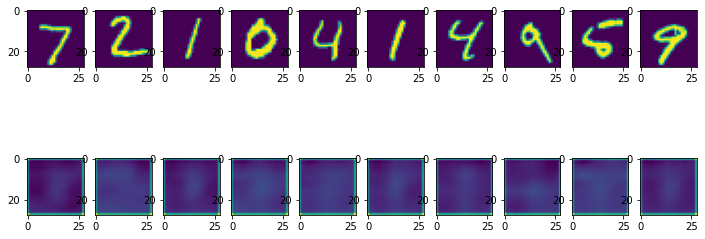

In [9]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

#### Decoder Layers for Reconstruction
- Decoder에서 이미지 복원을 위해 사용했던 Convolution 레이어는 실은 Encoder에서 사용했던 것과 동일한 레이어
- 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있는 것이다.
- Convolution 레이어를 거쳐 정보가 집약되는 것이 아니라 오히려 정보량이 많아지고 있다.

이것은 Convolution의 수학적 역연산으로서의 Deconvolution과는 다릅니다. 오히려 정방향의 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생해 내는 효과를 구현한 것입니다. 하지만 Convolution을 통해 Output shape가 줄어드는 것이 얼마든지 가능하듯, 늘어나는 것도 얼마든지 가능합니다. 단지 우리의 AutoEncoder 구조가 얼마나 정보손실 없이 원본 데이터를 잘 압축하고 있느냐에 따라 Decoder가 뽑아낼 수 있는 최종적인 이미지의 퀄리티가 결정됩니다.

#### Upsampling 레이어
- Max pooling 레이어를 통해 Downsampling을 시도해 왔다면, 이제 Upsampling 레이어를 통해 그 반대 작업을 수행하게 된다.
    - Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
    - Bed of Nails : 복원해야 할 값을 0으로 처리한다.
    - Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.

In [10]:
# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder=Model(input_img, decoded)
autoencoder.summary()

NameError: name 'Conv2DTranspose' is not defined